In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pistachio-image-dataset/Pistachio_Image_Dataset/Pistachio_Image_Dataset_Request.txt
/kaggle/input/pistachio-image-dataset/Pistachio_Image_Dataset/Pistachio_16_Features_Dataset/Pistachio_16_Features_Dataset.arff
/kaggle/input/pistachio-image-dataset/Pistachio_Image_Dataset/Pistachio_16_Features_Dataset/Pistachio_16_Features_Dataset.xls
/kaggle/input/pistachio-image-dataset/Pistachio_Image_Dataset/Pistachio_16_Features_Dataset/Pistachio_16_Features_Dataset_Citation_Request.txt
/kaggle/input/pistachio-image-dataset/Pistachio_Image_Dataset/Pistachio_16_Features_Dataset/Pistachio_16_Features_Dataset.xlsx
/kaggle/input/pistachio-image-dataset/Pistachio_Image_Dataset/Pistachio_Image_Dataset/Pistachio_Image_Dataset_Request.txt
/kaggle/input/pistachio-image-dataset/Pistachio_Image_Dataset/Pistachio_Image_Dataset/Kirmizi_Pistachio/kirmizi 1109.jpg
/kaggle/input/pistachio-image-dataset/Pistachio_Image_Dataset/Pistachio_Image_Dataset/Kirmizi_Pistachio/kirmizi (10).jpg
/kaggle/input/p

In [2]:
import cv2
import matplotlib.pyplot as plt
import requests
from PIL import Image

processing and importing the pistachio pictures

In [3]:
X_train=[]
y_train=[]
folder_path='/kaggle/input/pistachio-image-dataset/Pistachio_Image_Dataset/Pistachio_Image_Dataset/Kirmizi_Pistachio'
for filename in os.listdir(folder_path):
    #construct the path file
    file_path = os.path.join(folder_path, filename)
    image = cv2.imread(file_path)
    if image is not None:
        # add the image to the list as a numpy array
        X_train.append(np.array(image))
        y_train.append('Kirmizi')

taking the first 400 images only

In [4]:
X_train=X_train[0:400]
y_train=y_train[0:400]

Text(0.5, 1.0, 'Kirmizi')

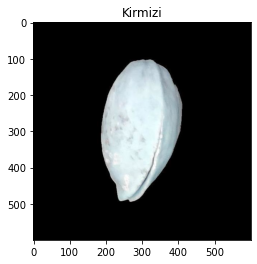

In [5]:
plt.imshow(X_train[256])
plt.title(y_train[256])

In [6]:
X_train_2=[]
y_train_2=[]
folder_path='/kaggle/input/pistachio-image-dataset/Pistachio_Image_Dataset/Pistachio_Image_Dataset/Kirmizi_Pistachio'
for filename in os.listdir(folder_path):
    #construct the path file
    file_path = os.path.join(folder_path, filename)
    image = cv2.imread(file_path)
    if image is not None:
        # add the image to the list as a numpy array
        X_train_2.append(np.array(image))
        y_train_2.append('Siirt')

processing the second class and taking only the first 400 siirt images in pistachios

In [7]:
X_train_2=X_train_2[0:400]
y_train_2=y_train_2[0:400]

In [8]:
X_train.extend(X_train_2)
y_train.extend(y_train_2)

Text(0.5, 1.0, 'Siirt')

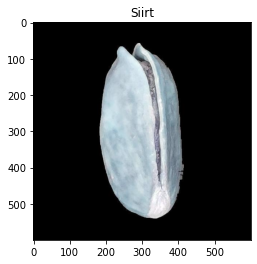

In [9]:
plt.imshow(X_train[556])
plt.title(y_train[556])

converting the image lists to numpy arrays for easier processing

In [10]:
X_train=np.stack(X_train,axis=0)
y_train=np.stack(y_train,axis=0)

In [11]:
X_train.shape

(800, 600, 600, 3)

In [12]:
y_train.shape

(800,)

shuffling the arrays

In [13]:
from sklearn.utils import shuffle
X_train_final, y_train_final = shuffle(X_train, y_train, random_state=0)

plotting some samples of both classes for better EDA

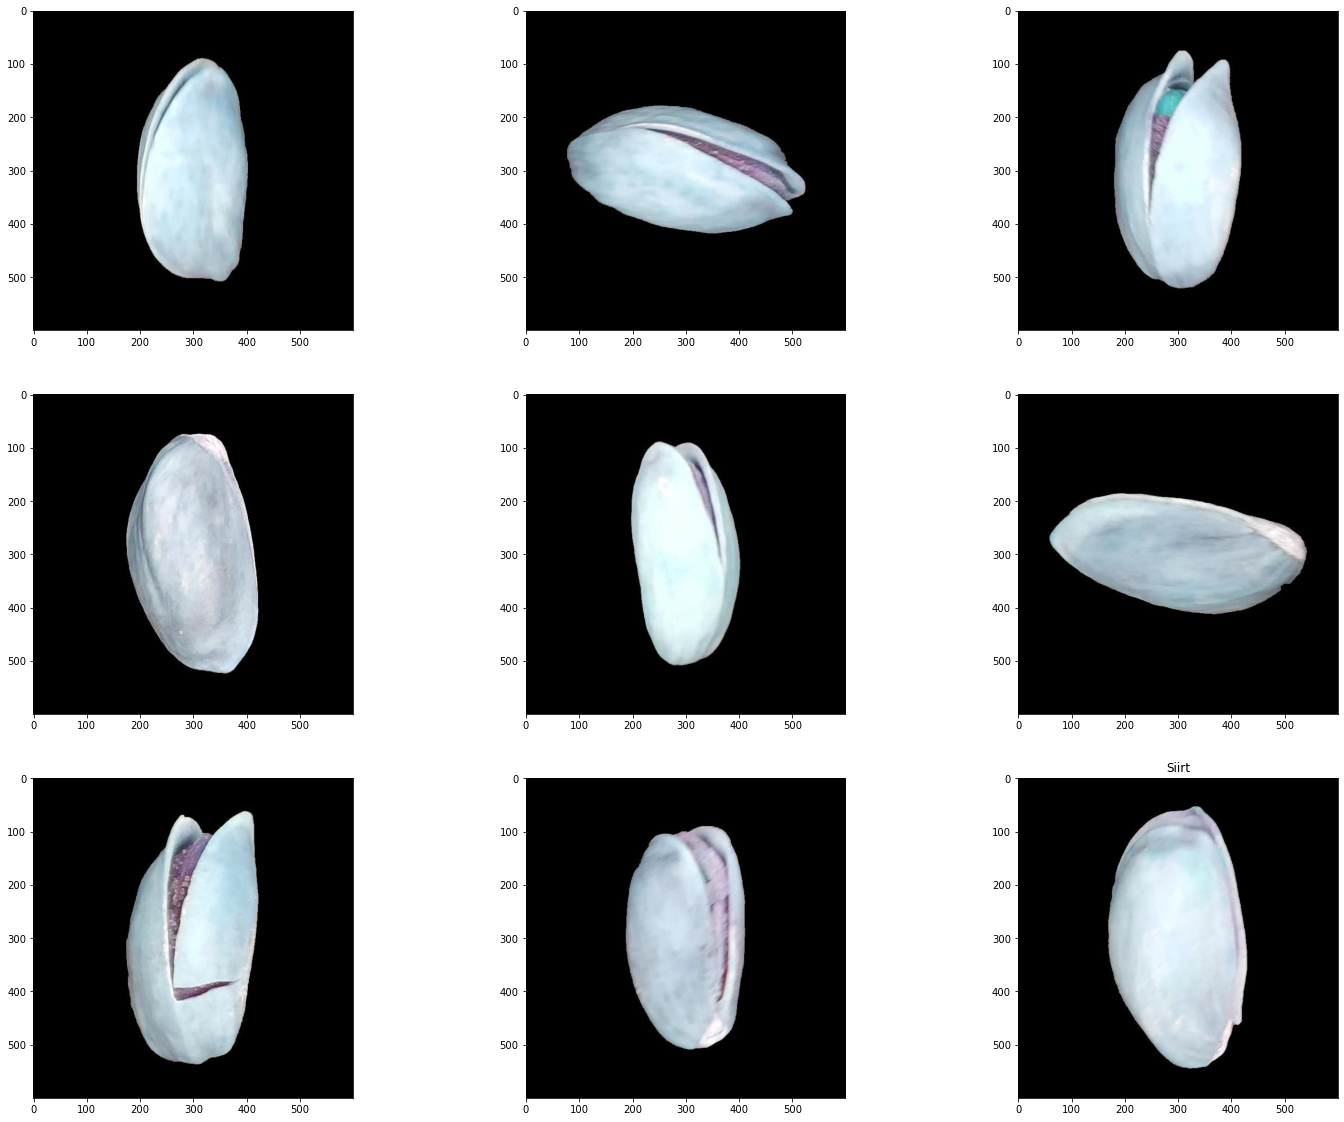

In [14]:
fig, axes = plt.subplots(3,3, figsize=(25,20))
axes = axes.ravel()#ravel changes the (2,2) array to a (4,) array to make it easier to iterate

# Plot each image in a separate subplot
for i, ax in enumerate(axes):
    if i<=5:
     ax.imshow(X_train[i])
     plt.title(y_train[i])
    else:
     ax.imshow(X_train[i+400])
     plt.title(y_train[i+400])
plt.show()

creating a CNN to try and classify and extract needed insights

In [15]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = keras.Sequential()

# add the first convolutional layer
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(600,600,3)))

# add the max pooling layer
model.add(MaxPooling2D(2,2))

# add a second convolutional layer
model.add(Conv2D(64, (3,3), activation='relu'))

# add another max pooling layer
model.add(MaxPooling2D(2,2))

# flatten the data for the dense layer
model.add(Flatten())

# add a dense layer with 128 units and a ReLU activation function
model.add(Dense(128, activation='relu'))

# add the output layer with a sigmoid activation function
model.add(Dense(2, activation='sigmoid'))

# compile the model with binary crossentropy loss and the RMSprop optimizer
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

2023-02-05 10:13:05.048067: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-05 10:13:05.134575: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-05 10:13:05.135432: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-05 10:13:05.137208: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

viewing the final summary of the model

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 598, 598, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 299, 299, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 297, 297, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 148, 148, 64)      0         
_________________________________________________________________
flatten (Flatten)            (None, 1401856)           0         
_________________________________________________________________
dense (Dense)                (None, 128)               179437696 
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 2

splitting the image data into training and valiation data accordingly

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train_final,y_train_final,test_size=0.1, random_state=42)

label encoding the titles and then fitting the CNN

In [18]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_val = encoder.transform(y_val)
from tensorflow.keras.utils import to_categorical
num_classes = len(np.unique(y_train))
y_train = to_categorical(y_train, num_classes)
y_val = to_categorical(y_val, num_classes)

# Fit the model
history = model.fit(X_train, y_train, epochs=12, batch_size=32, validation_data=(X_val, y_val))

2023-02-05 10:13:07.804125: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 777600000 exceeds 10% of free system memory.
2023-02-05 10:13:08.188890: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 777600000 exceeds 10% of free system memory.
2023-02-05 10:13:08.831546: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/12


2023-02-05 10:13:10.261445: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


23/23 [==============================] - 13s 205ms/step - loss: 384.1988 - accuracy: 0.4556 - val_loss: 3.3895 - val_accuracy: 0.4250
Epoch 2/12
23/23 [==============================] - 4s 170ms/step - loss: 1.5458 - accuracy: 0.4250 - val_loss: 1.2195 - val_accuracy: 0.1125
Epoch 3/12
23/23 [==============================] - 4s 163ms/step - loss: 0.8141 - accuracy: 0.4000 - val_loss: 0.8211 - val_accuracy: 0.0500
Epoch 4/12
23/23 [==============================] - 4s 164ms/step - loss: 0.7140 - accuracy: 0.3750 - val_loss: 0.7447 - val_accuracy: 0.0125
Epoch 5/12
23/23 [==============================] - 4s 164ms/step - loss: 0.6965 - accuracy: 0.4236 - val_loss: 0.7250 - val_accuracy: 0.0125
Epoch 6/12
23/23 [==============================] - 4s 164ms/step - loss: 0.6949 - accuracy: 0.4014 - val_loss: 0.7030 - val_accuracy: 0.1000
Epoch 7/12
23/23 [==============================] - 4s 165ms/step - loss: 0.6984 - accuracy: 0.4986 - val_loss: 0.7934 - val_accuracy: 0.0125
Epoch 8/12
23/

will need to try more models. 0.4472 accuracy can be improved upon

plotting the accuracy curves

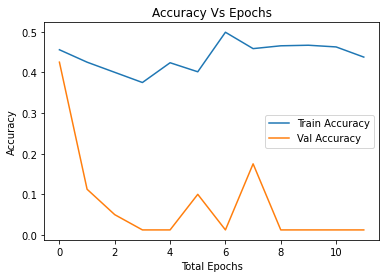

In [19]:
# Accuracy and Loss plot
plt.plot(history.history['accuracy'], label = 'Train Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Val Accuracy')
plt.xlabel('Total Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Vs Epochs')
plt.legend()

plotting the loss function progression

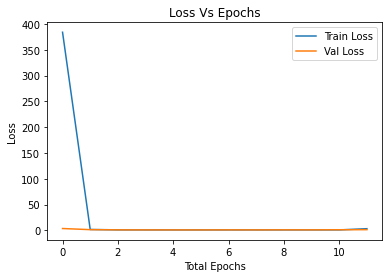

In [20]:
plt.plot(history.history['loss'], label = 'Train Loss')
plt.plot(history.history['val_loss'], label = 'Val Loss')
plt.xlabel('Total Epochs')
plt.ylabel('Loss')
plt.title('Loss Vs Epochs')
plt.legend()

and that's a wrap!:)